# DATA TRANSFORMATION

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas import plotting

pd.options.display.max_columns = 4000

In [2]:
df = pd.read_csv('../preprocessed_kepler.csv')

In [3]:
df.describe(include='all')

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,9564.000000,9.564000e+03,9564,2294,9564,9564,8054.000000,9564.000000,9564.000000,9564.000000,9564.000000,9564.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9201.000000,9110.000000,9110.000000,9564.000000,9110.000000,9110.000000,9.201000e+03,9110.000000,9110.000000,9201.000000,9201.000000,9201.000000,9201.000000,0.0,0.0,9.243000e+03,9.243000e+03,9.243000e+03,9201.000000,9218.000000,9218,9201.000000,9096.000000,9081.000000,9201.000000,9096.000000,9096.000000,9201.000000,9096.000000,9096.000000,9564.000000,9564.000000,9563.000000
unique,NaN,NaN,9564,2294,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,K04610.01,Kepler-732 c,FALSE POSITIVE,FALSE POSITIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,q1_q17_dr25_tce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,1,5023,5068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4782.500000,7.690628e+06,NaN,NaN,NaN,NaN,0.480829,0.188206,0.231598,0.194898,0.120033,75.671358,0.002148,-0.002148,166.183251,0.009933,-0.009933,0.735105,1.959861,-0.332557,5.621606,0.339942,-0.339942,2.379134e+04,123.197563,-123.197563,102.891778,17.657684,-33.023314,1085.385828,NaN,NaN,7.745737e+03,3.750698e+03,-4.043522e+03,259.895001,1.243654,NaN,5706.823280,144.635554,-162.265059,4.310157,0.120738,-0.143161,1.728712,0.362292,-0.394806,292.060163,43.810433,14.264606
std,2761.033321,2.653459e+06,NaN,NaN,NaN,NaN,0.476928,0.390897,0.421875,0.396143,0.325018,1334.744046,0.008236,0.008236,67.918960,0.023097,0.023097,3.348832,9.421653,1.249828,6.471554,0.669823,0.669823,8.224268e+04,4112.615230,4112.615230,3077.639126,391.138501,1193.519910,856.351161,NaN,NaN,1.592047e+05,5.504421e+04,8.838831e+04,795.806615,0.664573,NaN,796.857947,47.052305,72.746348,0.432606,0.132837,0.085477,6.127185,0.930870,2.168213,4.766657,3.601243,1.385448
min,1.000000,7.574500e+05,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,0.000000,-0.172500,120.515914,0.000009,-0.569000,0.000000,0.000000,-59.320000,0.052000,0.000000,-20.200000,0.000000e+00,0.000000,-388600.000000,0.080000,0.000000,-77180.000000,25.000000,NaN,NaN,0.000000e+00,0.000000e+00,-5.600031e+06,0.000000,1.000000,NaN,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-116.137000,279.852720,36.577381,6.966000
25%,2391.750000,5.556034e+06,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,2.733684,0.000005,-0.000276,132.761718,0.001240,-0.010500,0.197000,0.040000,-0.445000,2.437750,0.050800,-0.350000,1.599000e+02,9.600000,-49.500000,1.400000,0.230000,-1.940000,539.000000,NaN,NaN,2.015000e+01,9.190000e+00,-2.873100e+02,12.000000,1.000000,NaN,5310.000000,106.000000,-198.000000,4.218000,0.042000,-0.196000,0.829000,0.129000,-0.250000,288.660770,40.777173,13.440000
50%,4782.500000,7.906892e+06,NaN,NaN,NaN,NaN,0.334000,0.000000,0.000000,0.000000,0.000000,9.752831,0.000035,-0.000035,137.224595,0.004130,-0.004130,0.537000,0.193000,-0.207000,3.792600,0.142000,-0.142000,4.211000e+02,20.750000,-20.750000,

In [4]:
df.isnull().sum()

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          7270
koi_disposition         0
koi_pdisposition        0
koi_score            1510
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1       454
koi_period_err2       454
koi_time0bk             0
koi_time0bk_err1      454
koi_time0bk_err2      454
koi_impact            363
koi_impact_err1       454
koi_impact_err2       454
koi_duration            0
koi_duration_err1     454
koi_duration_err2     454
koi_depth             363
koi_depth_err1        454
koi_depth_err2        454
koi_prad              363
koi_prad_err1         363
koi_prad_err2         363
koi_teq               363
koi_teq_err1         9564
koi_teq_err2         9564
koi_insol             321
koi_insol_err1        321
koi_insol_err2        321
koi_model_snr         363
koi_tce_plnt_num      346
koi_tce_delivname     346
koi_steff   

In [5]:
notActive = ['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_pdisposition', 'koi_teq_err1', 'koi_teq_err2', 'koi_tce_delivname', 'koi_score']
df = df.drop(notActive, axis=1)

In [6]:
df = df.drop(df[df.koi_disposition == 'CANDIDATE'].index)

In [7]:
df= df.replace({'koi_disposition': {'CONFIRMED': 1, 'FALSE POSITIVE': 0}})

# DATA TRANSFORMATION: Normalization

In [8]:
df = df.fillna(df.mean())

In [9]:
X_kepler = df.values[:,1:]
y_kepler = df.values[:,0]

df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,615.8,19.5,-19.5,2.26,0.26,-0.15,793.0,93.59,29.45,-16.65,35.8,1.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,1,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,874.8,35.5,-35.5,2.83,0.32,-0.19,443.0,9.11,2.87,-1.62,25.8,2.0,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,0,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10829.0,171.0,-171.0,14.60,3.92,-1.31,638.0,39.30,31.04,-10.49,76.3,1.0,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,0,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8079.2,12.8,-12.8,33.46,8.50,-2.83,1395.0,891.96,668.95,-230.35,505.6,1.0,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,1,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.3,16.9,-16.9,2.75,0.88,-0.35,1406.0,926.16,874.33,-314.24,40.9,1.0,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb
import numpy as np

cv = StratifiedKFold(n_splits=10) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_kepler,y=y_kepler, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

/usr/lib/python3.9/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8489769983479476

In [14]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1, 20, 2)), 'weights':('distance', 'uniform')}
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10) 
clf = GridSearchCV(knc, param_grid=params, cv=cv, n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_kepler, y_kepler)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 9, 'weights': 'distance'} Accuracy= 0.8549753963914708


/usr/lib/python3.9/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [15]:
# Poor score. What could happen? 
# Remeber that all columns should be in the same range for KNN!!
# Could be that each colum is in a different range?

for i in range(13):
    print('std:', X_kepler[:,i].std(), 'min', X_kepler[:,i].min(), 'max', X_kepler[:, i].max())

std: 0.4306998142865243 min 0.0 max 1.0
std: 0.45755025653239634 min 0.0 max 1.0
std: 0.4357397508893314 min 0.0 max 1.0
std: 0.3637218821376634 min 0.0 max 1.0
std: 121.07412209217257 min 0.241842544 max 1071.232624
std: 0.008273456437910182 min 1.1000000000000001e-08 max 0.1725
std: 0.008273456437910182 min -0.1725 max -1.1000000000000001e-08
std: 65.64187929488227 min 120.5159138 max 1472.522306
std: 0.02101941335075974 min 8.7e-06 max 0.569
std: 0.02101941335075974 min -0.569 max -8.7e-06
std: 3.5923635061593533 min 0.0 max 100.806
std: 9.39910512747779 min 0.0 max 85.54
std: 1.1887456818793 min -37.53 max 0.0


In [16]:
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X_kepler)
X2=scaler.transform(X_kepler)

for i in range(13):
    print('std:',X2[:,i].std(),'min',X2[:,i].min(),'max',X2[:,i].max())

std: 0.9999999999999999 min -0.5712472518709594 max 1.7505554674001178
std: 0.9999999999999998 min -0.6521405955174382 max 1.5334116705410032
std: 1.0000000000000002 min -0.5847160707091617 max 1.7102317690484707
std: 1.0 min -0.43141849703617785 max 2.31793492135814
std: 0.9999999999999999 min -0.48379368514605353 max 8.361951078054997
std: 1.0 min -0.2566379481954387 max 20.593171353945795
std: 1.0 min -20.593171353945795 max 0.2566379481954387
std: 0.9999999999999999 min -0.6758191875052232 max 19.920885335934717
std: 1.0 min -0.4235329311917715 max 26.646266330329194
std: 1.0 min -26.646266330329194 max 0.4235329311917715
std: 1.0 min -0.22179641091916275 max 27.839395010038434
std: 1.0 min -0.22130150392953485 max 8.879564891311466
std: 1.0 min -31.297422799575596 max 0.2736698000361578


In [17]:
# Let's repeat the 10-fold Cross-validation with new data X2
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params, cv=cv, n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X2, y_kepler)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

/usr/lib/python3.9/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best Params= {'n_neighbors': 3, 'weights': 'distance'} Accuracy= 0.9766265718972116


/usr/lib/python3.9/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


# FEATURE SELECTION: Effect of irrelevant columns

<ipython-input-19-1a7f9371694b>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,4,1)
<ipython-input-19-1a7f9371694b>:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(5,4,2)
<ipython-input-19-1a7f9371694b>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and retur

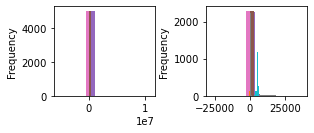

In [19]:
#TODO
import matplotlib.pyplot as plt

#plt.subplots(figsize=(10, 10))
#plt.subplots_adjust(hspace=0.27,wspace=0.5)
#for col in df.columns:
#    plt.subplot(5,4,1)
#    df[y_kepler==0][col].plot.hist(bins=10)
#    plt.subplot(5,4,2)
#    df[y_kepler==1][col].plot.hist(bins=10)
#plt.show()

In [20]:
nrcols=20
col = np.random.random(size=(X2.shape[0],nrcols))
scaler = preprocessing.StandardScaler().fit(col)
irelevant=scaler.transform(col)
for i in range(nrcols):
    print('std:', irelevant[:, i].std(), 'min', irelevant[:, i].min(), 'max', irelevant[:, i].max())

std: 1.0000000000000004 min -1.7268563131533188 max 1.714776977942552
std: 0.9999999999999999 min -1.753649160347848 max 1.725843701972812
std: 1.0000000000000007 min -1.7245814265846522 max 1.7122286919950156
std: 0.9999999999999978 min -1.716106015539515 max 1.7051285291234162
std: 1.0000000000000007 min -1.7236750506748568 max 1.7474064296666967
std: 1.0000000000000013 min -1.7286885780945762 max 1.7303095626572842
std: 1.000000000000001 min -1.7295045318102196 max 1.7436291663082142
std: 1.0 min -1.7246345526877105 max 1.7176038916549055
std: 1.0000000000000013 min -1.7455807548360065 max 1.7403880529455023
std: 1.0000000000000013 min -1.7089585000781853 max 1.7390884075121353
std: 0.9999999999999986 min -1.7430496856784892 max 1.7371990758596354
std: 0.9999999999999983 min -1.7238045071050252 max 1.721893531210876
std: 1.0000000000000004 min -1.7388602050130242 max 1.7579815465027544
std: 1.0000000000000009 min -1.7298911355595692 max 1.746573445134049
std: 1.0000000000000016 min 

In [21]:
X2_new=np.hstack((X2,irelevant))

from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv = StratifiedKFold(n_splits=10) 
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X2_new, y=y_kepler, cv=cv, scoring='accuracy')  
print(np.mean(cv_scores))

/usr/lib/python3.9/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9389071412018868


In [ ]:
knc = nb.KNeighborsClassifier()
cv = StratifiedKFold(n_splits=10, random_state=1) 
clf = GridSearchCV(knc, param_grid=params, cv=cv, n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X2_new, y_kepler)
print("Best Params=", clf.best_params_, "Accuracy=", clf.best_score_)

# Feature Selection: Ranking

In [22]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_reduced = SelectKBest(mutual_info_classif, k=2).fit_transform(X2_new, y_kepler)

# Let's do now the 10-fold cross-validation again
cv = StratifiedKFold(n_splits=10) 
clf = GridSearchCV(knc, param_grid=params, cv=cv, n_jobs=1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_reduced, y_kepler)
print("Best Params=", clf.best_params_, "Accuracy=", clf.best_score_)

/usr/lib/python3.9/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best Params= {'n_neighbors': 9, 'weights': 'uniform'} Accuracy= 0.8340623291416074


/usr/lib/python3.9/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [23]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_reduced = SelectKBest(mutual_info_classif, k=13).fit_transform(X2_new, y_kepler)

# Let's do now the 10-fold cross-validation again
cv = StratifiedKFold(n_splits=10, random_state=1)
clf = GridSearchCV(knc, param_grid=params, cv=cv, n_jobs=1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_reduced, y_kepler)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

/usr/lib/python3.9/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Best Params= {'n_neighbors': 17, 'weights': 'distance'} Accuracy= 0.8657736468015309


/usr/lib/python3.9/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


In [24]:
X2_new.shape

(7316, 60)

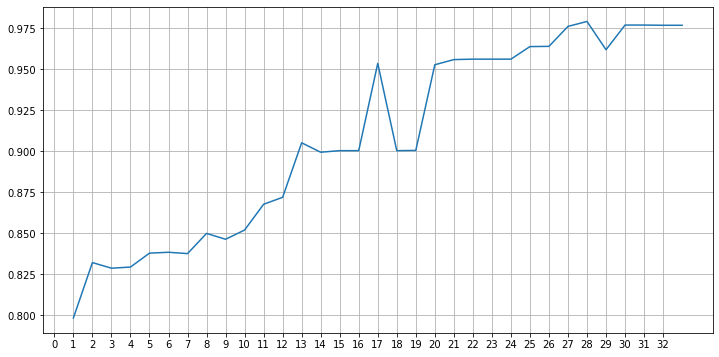

In [25]:
original = np.zeros(33)
for i in range(33):
    X_reduced = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2_new, y_kepler)
    cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_reduced,y=y_kepler, cv=cv, scoring='accuracy')  
    original[i]=np.mean(cv_scores)
    
from matplotlib.pyplot import figure
fig = figure(figsize=(12, 6))
plt.grid(True)
plt.xticks(np.arange(0, 33, step=1))
plt.plot(range(1, 34), original)
plt.show()

In [27]:
selector = SelectKBest(mutual_info_classif, k=17)

X_reduced = selector.fit_transform(X2_new, y_kepler)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
features_df_new = df.iloc[:, cols]

cv = StratifiedKFold(n_splits=10)
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_reduced, y=y_kepler, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

/usr/lib/python3.9/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8937986364961539

In [28]:
X_reduced[0]

array([-0.6521406 , -0.40742565, -0.32118469,  0.32118469, -0.36849022,
        0.36849022, -0.03705655, -0.04901472,  0.03134896,  0.05669936,
       -0.33309324, -0.33748031, -1.41982675,  1.14135612, -0.44848702,
        0.57507371, -0.2715837 ])

In [29]:
X2_new[0, :]

array([-0.57124725, -0.6521406 , -0.58471607, -0.4314185 , -0.40742565,
       -0.25328518,  0.25328518,  0.08623755, -0.32118469,  0.32118469,
       -0.18115464, -0.1874685 ,  0.15085127, -0.417555  , -0.36849022,
        0.36849022, -0.32992303, -0.02834185,  0.02834185, -0.03705655,
       -0.04901472,  0.03134896, -0.40424548, -0.05333417, -0.07315018,
        0.05669936, -0.33309324, -0.35729241, -0.33748031, -1.41982675,
        1.14135612,  0.37549504, -0.44848702,  0.57507371, -0.1403133 ,
       -0.2715837 ,  0.16199256, -0.04406496,  1.2151635 ,  0.7855312 ,
       -0.03590383,  0.22235523, -0.83706498, -1.44364453,  0.21228534,
       -1.27761434,  0.04825252, -0.20840249,  0.52094277, -0.18582501,
        0.10010487,  1.34221767, -0.17581622, -0.99100811, -0.45710912,
       -0.47143825, -1.42570981,  1.67258991, -0.34104874, -0.61080874])

In [30]:
cols

array([ 1,  4,  8,  9, 14, 15, 19, 20, 21, 25, 26, 28, 29, 30, 32, 33, 35])